In [1]:
import librosa, librosa.feature, librosa.display
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [6]:
def display_mfcc(dataset):
    y, _ = librosa.load(dataset)
    fitur_ektraksi = librosa.feature.mfcc(y)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(fitur_ektraksi, x_axis="time", y_axis="mel")
    # plt.colorbar()
    plt.title("Logat Bahasa")
    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_300\358362099.py:3: FutureWarning: Pass y=[-8.0691587e-09 -1.5535457e-08 -1.6741602e-08 ... -1.7201328e-01
 -1.1443206e-01 -4.2409297e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fitur_ektraksi = librosa.feature.mfcc(y)


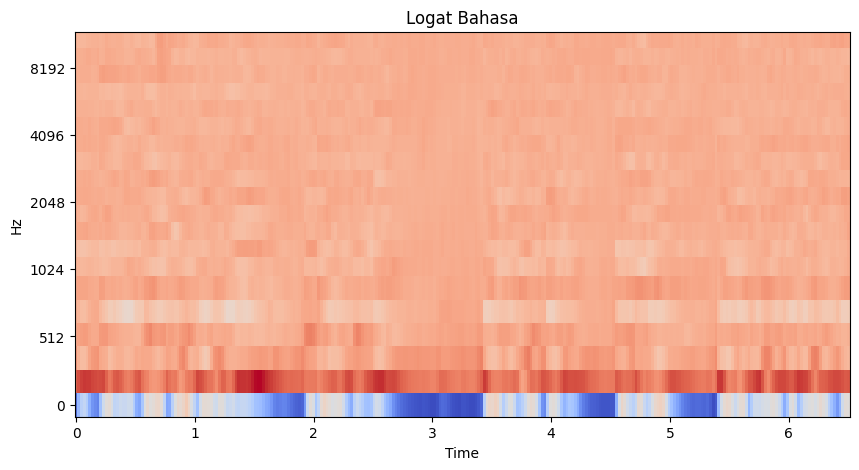

In [7]:
ex = display_mfcc("dataset-mp3/timur (16).mp3")
ex